In [2]:
import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
from pandas import DataFrame
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots

from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_pacf                    

%matplotlib inline

In [3]:
df = pd.read_csv("MinimumDailyTemperatures.csv", index_col=['Date'])
df.head

<bound method NDFrame.head of           Temp
Date          
01/01/81  20.7
02/01/81  17.9
03/01/81  18.8
04/01/81  14.6
05/01/81  15.8
06/01/81  15.8
07/01/81  15.8
08/01/81  17.4
09/01/81  21.8
10/01/81  20.0
11/01/81  16.2
12/01/81  13.3
13/01/81  16.7
14/01/81  21.5
15/01/81  25.0
16/01/81  20.7
17/01/81  20.6
18/01/81  24.8
19/01/81  17.7
20/01/81  15.5
21/01/81  18.2
22/01/81  12.1
23/01/81  14.4
24/01/81  16.0
25/01/81  16.5
26/01/81  18.7
27/01/81  19.4
28/01/81  17.2
29/01/81  15.5
30/01/81  15.1
...        ...
02/12/90  13.2
03/12/90  16.2
04/12/90  17.3
05/12/90  20.5
06/12/90  20.2
07/12/90  19.4
08/12/90  15.5
09/12/90  14.1
10/12/90  11.0
11/12/90  11.1
12/12/90  14.0
13/12/90  11.4
14/12/90  12.5
15/12/90  13.4
16/12/90  13.6
17/12/90  13.9
18/12/90  17.2
19/12/90  14.7
20/12/90  15.4
21/12/90  13.1
22/12/90  13.2
23/12/90  13.9
24/12/90  10.0
25/12/90  12.9
26/12/90  14.6
27/12/90  14.0
28/12/90  13.6
29/12/90  13.5
30/12/90  15.7
31/12/90  13.0

[3650 rows x 1 columns]>

In [4]:
df.columns

Index(['Temp'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3650 entries, 01/01/81 to 31/12/90
Data columns (total 1 columns):
Temp    3650 non-null float64
dtypes: float64(1)
memory usage: 57.0+ KB


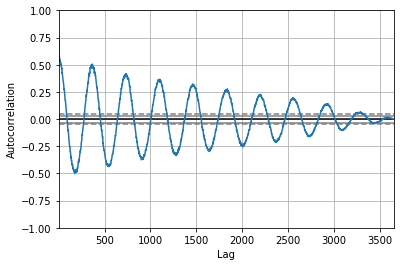

In [9]:
autocorrelation_plot(df)
plt.show()

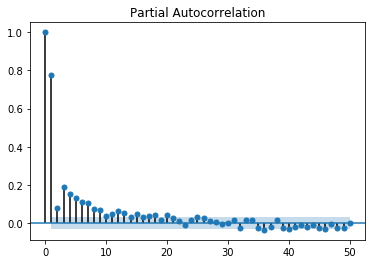

In [13]:
plot_pacf(df, lags=50)
plt.show()

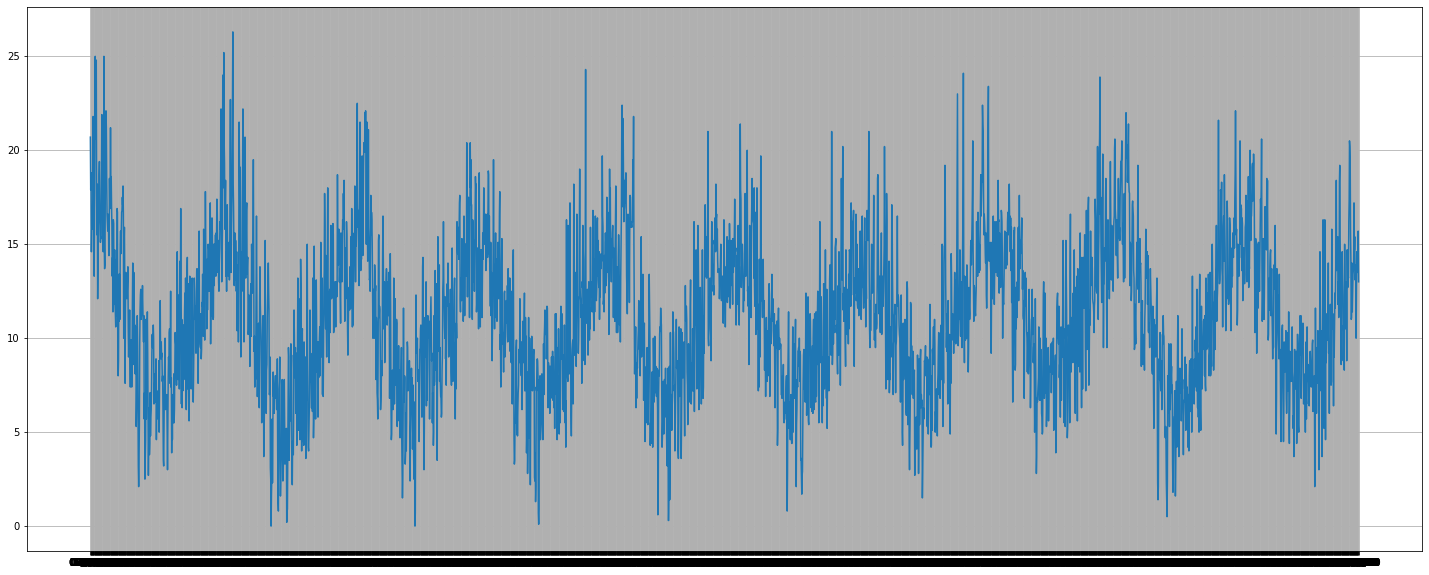

In [6]:
plt.figure(figsize=(25, 10))
plt.plot(df.Temp)
plt.grid(True)
plt.show()

                             ARIMA Model Results                              
Dep. Variable:                 D.Temp   No. Observations:                 3649
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -8495.810
Method:                       css-mle   S.D. of innovations              2.482
Date:                Tue, 10 Sep 2019   AIC                          17005.620
Time:                        12:45:14   BIC                          17049.036
Sample:                             1   HQIC                         17021.082
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0013      0.017     -0.076      0.940      -0.035       0.033
ar.L1.D.Temp    -0.3358      0.016    -20.469      0.000      -0.368      -0.304
ar.L2.D.Temp    -0.3911      0.017    -23.03

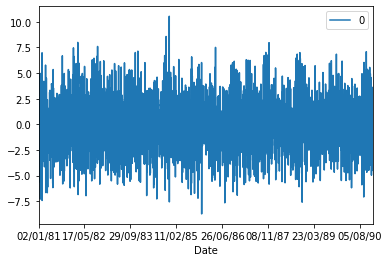

In [15]:
model = ARIMA(df, order=(5,1,0))
model_fit = model.fit(disp=0)

print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()


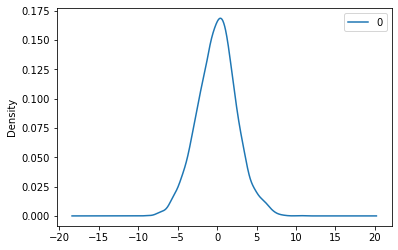

                 0
count  3649.000000
mean     -0.001055
std       2.482981
min      -8.731153
25%      -1.637912
50%       0.063771
75%       1.562933
max      10.547800


In [16]:
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [17]:
X = df.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=6.405942, expected=8.900000
predicted=8.890903, expected=8.700000
predicted=8.282123, expected=4.900000
predicted=5.799306, expected=7.000000
predicted=7.643748, expected=7.500000
predicted=7.161989, expected=7.000000
predicted=7.120258, expected=9.100000
predicted=8.523312, expected=11.800000
predicted=9.794630, expected=9.900000
predicted=8.854470, expected=5.600000
predicted=6.648145, expected=4.200000
predicted=6.128837, expected=4.300000
predicted=6.115477, expected=8.000000
predicted=8.245958, expected=5.100000
predicted=5.419575, expected=9.400000
predicted=8.158898, expected=9.100000
predicted=7.573994, expected=9.700000
predicted=8.394108, expected=10.600000
predicted=9.668661, expected=8.600000
predicted=8.200724, expected=10.100000
predicted=10.036292, expected=11.000000
predicted=10.420766, expected=9.700000
predicted=9.602837, expected=5.000000
predicted=6.803599, expected=6.100000
predicted=7.604512, expected=5.400000
predicted=6.725570, expected=5.800000
predic

predicted=16.051962, expected=14.900000
predicted=15.297625, expected=14.800000
predicted=14.928513, expected=12.700000
predicted=13.523983, expected=14.200000
predicted=14.257057, expected=16.800000
predicted=16.076759, expected=16.700000
predicted=15.705923, expected=16.200000
predicted=15.623074, expected=14.500000
predicted=14.569385, expected=10.000000
predicted=11.970334, expected=12.600000
predicted=14.102117, expected=11.900000
predicted=12.837653, expected=11.800000
predicted=12.461396, expected=13.400000
predicted=13.191481, expected=14.500000
predicted=13.326360, expected=15.700000
predicted=14.514734, expected=15.300000
predicted=14.334804, expected=13.900000
predicted=13.732473, expected=13.700000
predicted=14.039383, expected=15.100000
predicted=15.039394, expected=15.600000
predicted=15.275862, expected=14.400000
predicted=14.416415, expected=13.900000
predicted=14.131793, expected=16.200000
predicted=15.694438, expected=16.700000
predicted=15.953058, expected=15.500000


predicted=8.840777, expected=12.400000
predicted=11.860860, expected=9.000000
predicted=9.150340, expected=13.500000
predicted=12.402029, expected=14.700000
predicted=13.057616, expected=10.900000
predicted=10.567003, expected=8.500000
predicted=9.984973, expected=6.000000
predicted=7.993526, expected=12.700000
predicted=12.757076, expected=11.100000
predicted=10.742815, expected=8.700000
predicted=9.012421, expected=12.300000
predicted=11.472534, expected=13.300000
predicted=11.648582, expected=5.600000
predicted=7.435731, expected=13.700000
predicted=13.317754, expected=8.500000
predicted=8.588851, expected=11.200000
predicted=11.408808, expected=8.700000
predicted=9.414855, expected=11.700000
predicted=10.789652, expected=12.500000
predicted=11.954348, expected=8.200000
predicted=8.596890, expected=15.600000
predicted=14.261299, expected=10.300000
predicted=9.879266, expected=11.400000
predicted=11.709248, expected=9.700000
predicted=10.463750, expected=6.300000
predicted=7.878767, 

predicted=10.578919, expected=11.900000
predicted=10.975144, expected=14.000000
predicted=12.514699, expected=15.800000
predicted=13.750814, expected=14.500000
predicted=13.077616, expected=13.200000
predicted=13.063405, expected=14.200000
predicted=14.091023, expected=14.600000
predicted=14.478918, expected=11.800000
predicted=12.735106, expected=14.400000
predicted=14.461743, expected=10.400000
predicted=11.328490, expected=10.300000
predicted=11.658267, expected=10.800000
predicted=11.659053, expected=10.500000
predicted=10.911368, expected=9.500000
predicted=10.355496, expected=12.500000
predicted=11.868725, expected=13.700000
predicted=12.408141, expected=12.700000
predicted=11.943121, expected=11.900000
predicted=11.719562, expected=11.400000
predicted=11.515741, expected=9.700000
predicted=10.739612, expected=8.300000
predicted=9.869618, expected=8.100000
predicted=9.405913, expected=11.700000
predicted=11.383434, expected=11.600000
predicted=10.802148, expected=7.400000
predict

predicted=13.882935, expected=14.400000
predicted=14.841078, expected=12.900000
predicted=13.951051, expected=13.100000
predicted=14.332159, expected=14.000000
predicted=15.055117, expected=17.900000
predicted=16.551447, expected=17.700000
predicted=16.146292, expected=16.300000
predicted=15.508685, expected=18.300000
predicted=17.292015, expected=13.700000
predicted=14.388373, expected=13.300000
predicted=14.971296, expected=10.600000
predicted=12.762515, expected=14.100000
predicted=14.767983, expected=16.000000
predicted=15.481030, expected=16.500000
predicted=15.196681, expected=14.100000
predicted=13.801008, expected=18.700000
predicted=17.058754, expected=16.200000
predicted=15.582050, expected=14.800000
predicted=15.349276, expected=12.600000
predicted=13.979968, expected=10.400000
predicted=12.291388, expected=12.200000
predicted=13.711610, expected=12.600000
predicted=13.044581, expected=12.100000
predicted=12.348066, expected=17.300000
predicted=15.544692, expected=16.400000


predicted=7.460062, expected=8.300000
predicted=7.659695, expected=9.100000
predicted=8.566275, expected=7.700000
predicted=7.929782, expected=10.600000
predicted=9.837984, expected=8.200000
predicted=8.086794, expected=7.900000
predicted=8.260856, expected=5.200000
predicted=6.500427, expected=5.900000
predicted=6.886700, expected=3.700000
predicted=5.331650, expected=5.600000
predicted=6.201540, expected=9.400000
predicted=8.253875, expected=7.400000
predicted=6.398931, expected=7.300000
predicted=6.906286, expected=7.700000
predicted=7.129100, expected=7.700000
predicted=7.457244, expected=9.300000
predicted=8.938030, expected=4.400000
predicted=5.343586, expected=5.700000
predicted=6.631803, expected=10.200000
predicted=9.273407, expected=10.200000
predicted=8.868983, expected=9.300000
predicted=8.692358, expected=5.400000
predicted=5.934956, expected=5.000000
predicted=6.281624, expected=7.600000
predicted=8.197898, expected=9.600000
predicted=8.965644, expected=10.400000
predicte

NameError: name 'mean_squared_error' is not defined

In [19]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 5.707


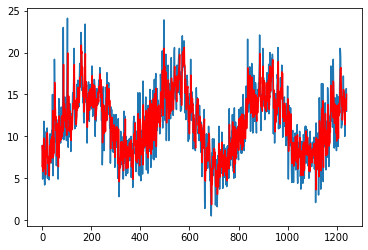

In [20]:
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()